In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
price_path = '/Users/feizhan/Dropbox/Project2M/ASXYearlyCompanyConsolidation/'

In [3]:
years = [2013, 2014, 2015, 2016]
dat = pd.DataFrame({})
for year in years:
    dat = dat.append(pd.read_csv(os.path.join(price_path, str(year)+'price.csv')))

In [4]:
dat.loc[:, 'Date'] = pd.to_datetime(dat.loc[:, 'Date'])
gpd = dat.groupby('code')
hist_min = gpd['Close'].min()
last_price = gpd['Close'].last()
last_volume = gpd['Volume'].last()
low = (last_price < 1.01 * hist_min) & (.1 < last_price) & (last_price < 5) & (last_volume > 0)

In [5]:
low.value_counts()

False    1996
True       23
dtype: int64

In [6]:
low.loc[low].index

Index(['AJL.AX', 'BIQ.AX', 'CDD.AX', 'CDU.AX', 'CLX.AX', 'EPW.AX', 'EWC.AX',
       'FFC.AX', 'FRI.AX', 'GFI.AX', 'JHL.AX', 'LGD.AX', 'MGC.AX', 'MJP.AX',
       'MYE.AX', 'PPC.AX', 'RUL.AX', 'SIO.AX', 'SKT.AX', 'SLM.AX', 'SWL.AX',
       'TPE.AX', 'USR.AX'],
      dtype='object', name='code')

In [7]:
years = [2011, 2012, 2013, 2014, 2015, 2016]
dat = pd.DataFrame({})
for year in years:
    dat = dat.append(pd.read_csv(os.path.join(price_path, str(year)+'price.csv')))

In [21]:
code = 'CDD.AX'

In [22]:
code_dat = dat.loc[(dat.code == code).values].copy()

In [23]:
code_dat.head()

,Adj Close,Close,Date,High,Low,Open,Volume,code,is_last_11_day
66838,2.57446,4.29892,2011-01-03,4.29892,4.29892,4.29892,0.0,CDD.AX,NaN
66839,2.58372,4.31438,2011-01-04,4.32985,4.29892,4.32985,99200.0,CDD.AX,NaN
66840,2.61613,4.36850,2011-01-05,4.36850,4.26026,4.26799,100600.0,CDD.AX,NaN
66841,2.63928,4.40716,2011-01-06,4.44582,4.36077,4.37624,68800.0,CDD.AX,NaN
66842,2.59299,4.32985,2011-01-07,4.44582,4.32985,4.43036,56300.0,CDD.AX,NaN


In [24]:
code_dat.loc[:, 'Date'] = pd.to_datetime(code_dat.loc[:, 'Date'])

In [25]:
code_dat = code_dat.set_index('Date')

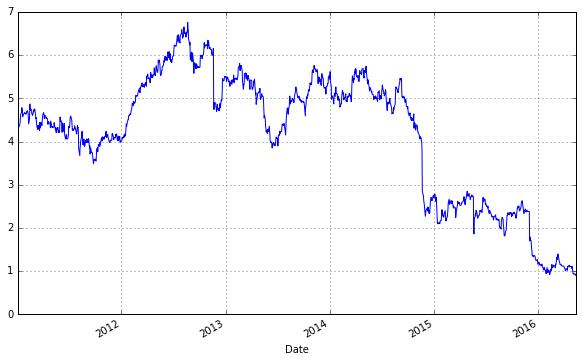

In [26]:
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)
code_dat.loc[:, 'Close'].plot(kind='line')
plt.grid()

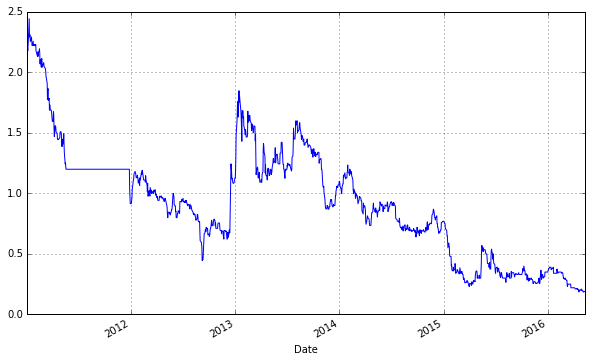

In [14]:
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)
code_dat.loc[:, 'Adj Close'].plot(kind='line')
plt.grid()

In [108]:
asx_sector = pd.read_excel('sector_codes.xlsx')

In [16]:
asx_sector

,sector_code,name
0,^AXPJ,S&P/ASX 200 A-REIT
1,^AXDJ,S&P/ASX 200 Cons Disc
2,^AXSJ,S&P/ASX 200 Cons Staples
3,^AXEJ,S&P/ASX 200 Energy
4,^AXXJ,S&P/ASX 200 Fin-x-Prop
5,^AXFJ,S&P/ASX 200 Financials
6,^AXHJ,S&P/ASX 200 Health Care
7,^AXNJ,S&P/ASX 200 Industrials
8,^AXIJ,S&P/ASX 200 Info Tech
9,^AXMJ,S&P/ASX 200 Materials


In [17]:
asx_list = pd.read_excel('asx_full.xlsx')

In [110]:
asx_list.loc[(asx_list.loc[:, 'ASX code'] == 'SIO'), 'GICS industry group']

1804    Consumer Durables & Apparel
Name: GICS industry group, dtype: object